#### Checking the different AIA temperature responses
All have been calculated in ssw via [make_aiaresp_for.py](make_aiaresp_for.py)

See [aia_get_response.pro](https://hesperia.gsfc.nasa.gov/ssw/sdo/aia/idl/response/aia_get_response.pro) in ssw/sdo/aia/idl for what these mean.

Versions are :
* aia_tresp.dat - default
* aia_tresp_en.dat - /evenorm (best option?)
* aia_tresp_en_nb.dat - /evenorm,/noblend
* aia_tresp_en_cf.dat - /evenorm, /chiantifix
* aia_tresp_en_ph.dat - /evenorm, /use_photospheric _not currently working_


06-Nov-2025 IGH

In [1]:
# Import some of the stuff we will need
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as io

import warnings
warnings.simplefilter('ignore')
matplotlib.rcParams['font.size'] = 16

In [2]:
trin=io.readsav('aia_tresp_en.dat')
# Get rid of the b in the string name (byte vs utf stuff....)
for i in np.arange(len(trin['channels'])):
    trin['channels'][i]=trin['channels'][i].decode("utf-8")
tresp_logt=np.array(trin['logt'])
nt=len(tresp_logt)
nf=len(trin['tr'][:])
trmatrix=np.zeros((nt,nf))
for i in range(0,nf):
    trmatrix[:,i]=trin['tr'][i]


In [3]:
# Repeat for noblend
trin_df=io.readsav('aia_tresp.dat')
tresp_logt_df=np.array(trin_df['logt'])
trmatrix_df=np.zeros((nt,nf))
for i in range(0,nf):
    trmatrix_df[:,i]=trin_df['tr'][i]

# Repeat for noblend
trin_nb=io.readsav('aia_tresp_en_nb.dat')
tresp_logt_nb=np.array(trin_nb['logt'])
trmatrix_nb=np.zeros((nt,nf))
for i in range(0,nf):
    trmatrix_nb[:,i]=trin_nb['tr'][i]

# Repeat for chiantifix
trin_cf=io.readsav('aia_tresp_en_cf.dat')
tresp_logt_cf=np.array(trin_cf['logt'])
trmatrix_cf=np.zeros((nt,nf))
for i in range(0,nf):
    trmatrix_cf[:,i]=trin_cf['tr'][i]


In [4]:
# Check the response look correct by plotting them
# Setup some AIA colours
clrs=['darkgreen','darkcyan','gold','sienna','indianred','darkslateblue']
xr=[5.0,8.0]
yr=[2e-30,5e-23]

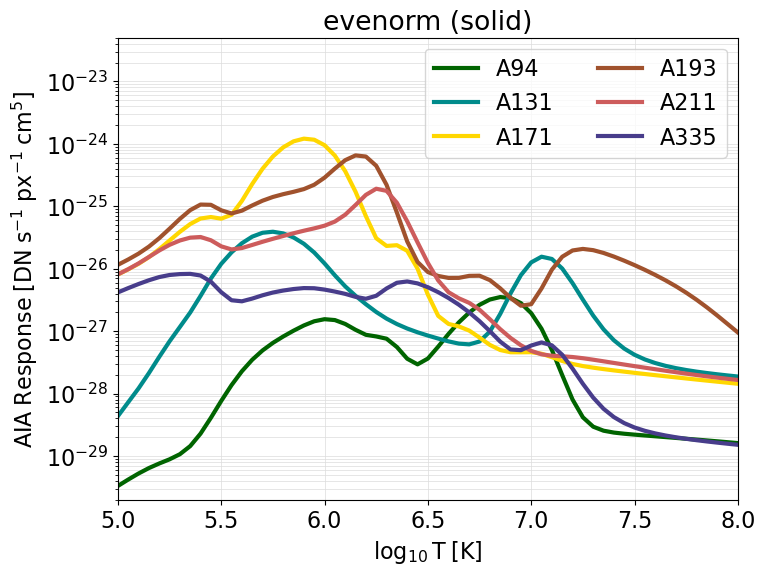

In [5]:
# Plot the response
fig = plt.figure(figsize=(8, 6))
for i in np.arange(6):
    plt.semilogy(tresp_logt,trmatrix[:,i],label=trin['channels'][i],color=clrs[i],lw=3)
plt.xlabel('$\mathrm{\log_{10}T\;[K]}$')
plt.ylabel('$\mathrm{AIA\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5]}$')
plt.ylim(yr)
plt.xlim(xr)
plt.legend(ncol=2)
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.title('evenorm (solid)')
plt.show()

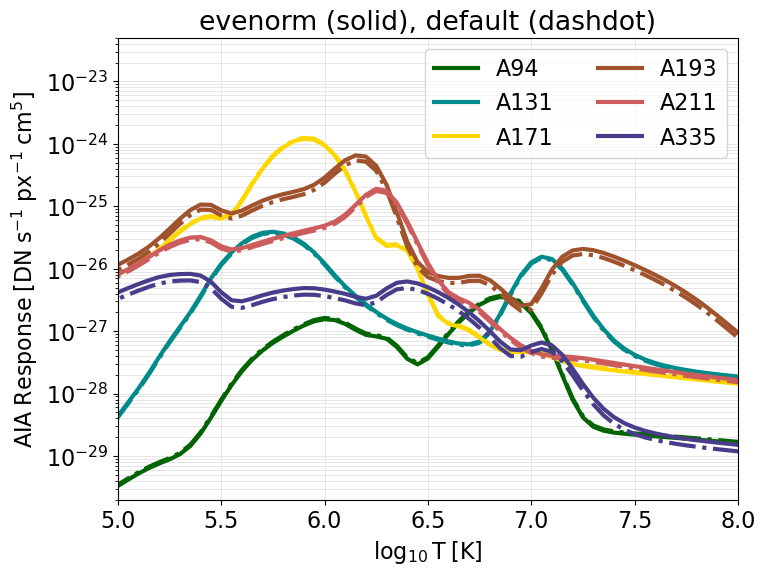

In [6]:
# Plot response and default version
fig = plt.figure(figsize=(8,6))
for i in np.arange(6):
    plt.semilogy(tresp_logt,trmatrix[:,i],label=trin['channels'][i],color=clrs[i],lw=3)
    plt.semilogy(tresp_logt_df,trmatrix_df[:,i],ls='dashdot',lw=3,color=clrs[i])
plt.xlabel('$\mathrm{\log_{10}T\;[K]}$')
plt.ylabel('$\mathrm{AIA\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5]}$')
plt.ylim(yr)
plt.xlim(xr)
plt.legend(ncol=2)
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.title('evenorm (solid), default (dashdot)')
plt.show()

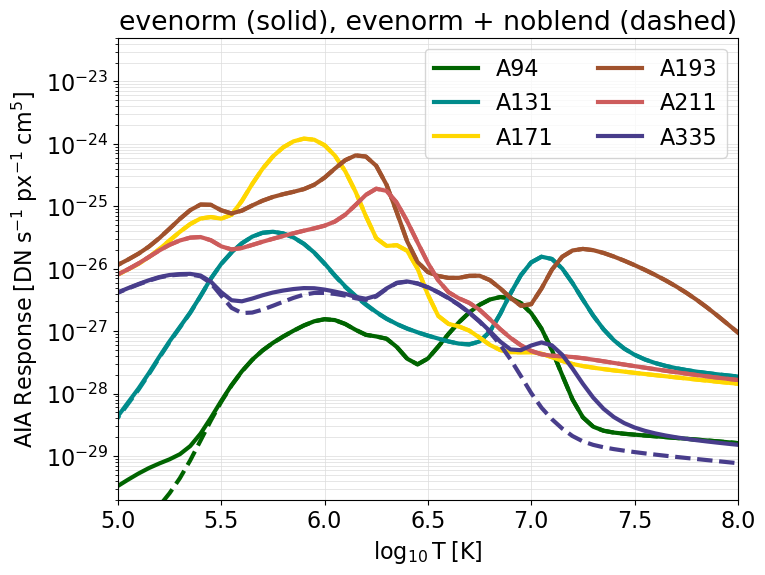

In [7]:
# Plot response and noblend version
fig = plt.figure(figsize=(8,6))
for i in np.arange(6):
    plt.semilogy(tresp_logt,trmatrix[:,i],label=trin['channels'][i],color=clrs[i],lw=3)
    plt.semilogy(tresp_logt_nb,trmatrix_nb[:,i],ls='dashed',lw=3,color=clrs[i])
plt.xlabel('$\mathrm{\log_{10}T\;[K]}$')
plt.ylabel('$\mathrm{AIA\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5]}$')
plt.ylim(yr)
plt.xlim(xr)
plt.legend(ncol=2)
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.title('evenorm (solid), evenorm + noblend (dashed)')
plt.show()

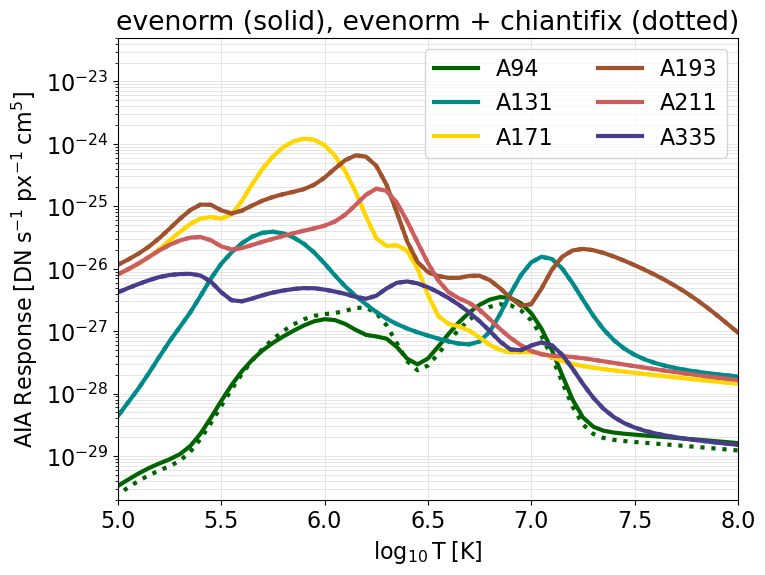

In [8]:
# Plot response and chiantifix version
fig = plt.figure(figsize=(8,6))
for i in np.arange(6):
    plt.semilogy(tresp_logt,trmatrix[:,i],label=trin['channels'][i],color=clrs[i],lw=3)
    plt.semilogy(tresp_logt_cf,trmatrix_cf[:,i],ls='dotted',lw=3,color=clrs[i])
plt.xlabel('$\mathrm{\log_{10}T\;[K]}$')
plt.ylabel('$\mathrm{AIA\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5]}$')
plt.ylim(yr)
plt.xlim(xr)
plt.legend(ncol=2)
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.title('evenorm (solid), evenorm + chiantifix (dotted)')
plt.show()